# COMP7930 Big Data Analytics 

# Assignment 1 Data Visualization using Python

---

| Students Name | ID | 
|---|---|
| 💡LIU YONGYU | 💡19414617 |

* Lecturer: [Dr. Kevin Wang](mailto:kevinw@comp.hkbu.edu.hk)
* TA in-charge: [Ningxia Wang](mailto:nxwang@comp.hkbu.edu.hk)


Assignment Due: 21/2/2020 (Friday)

Submission: Submit this `ipynb` file and the `csv` file for your Q3 to Moodle. 

---

## Packages you should install 

To begin with, you should download this `ipynb` file with your *jupyter notebook*. Please refer to the lecture note to install and launch jupyter notebook. 

You are required to install the following packages. It is recommended to use `pip` to install these packages:
* `jupyter notebook`
* `seaborn`
* `matplotlib`
* `pandas`

Jupyter notebook, or the *notebook*, is our integrated development environment (IDE). 


Python has long been great for data munging and preparation, but less so for data analysis and modeling. 
`Pandas` helps filling this gap, enables you to carry out your data analysis workflow in Python without having to switch to a more domain specific language like R. `Pandas` is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

The `matplotlib` API can be used to create decent plots such as bar graphs, histograms, scatter plots, etc. It allows you to perform many fine-grained control in plotting graph. 

`Seaborn` built on `matplotlib` provides a high-level interface for drawing attractive and informative statistical graphics. That means you are allowed to visualize your data in a very convenient way.

Note: We assume the use of Python 3.8 or above.

## How to do this assignment?

The first half of the assignment is a guided tutorial that allow you to run the code and observe the result. The second half of the assignment requires you to produce certain code for visualization. Look for the 💡 symbol that action is required.

---

# Basic Operation - Let's eat some Avocados

Download the dataset `avocado.csv` which contains a weekly retail and price of avocado in 2018. Run the following code to read the data. Make sure you have placed `avocado.csv` in the same directory as your notebook. 

(To run the code below, click the cell and click `Cell` > `Run Cells` on the menu bar to run it. Or simple press `Ctrl-Enter`)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('avocado.csv', index_col='Date', parse_dates=True)
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
Date,,,,,,,,,,,
2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany
2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany
2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany
2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany
2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany


The above code read the data into the variable `df` as a **DataFrame**. A DataFrame can be considered as a row of data in Pandas. We print the first five rows in the `df` by `df.head()`.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17911 entries, 2015-12-27 to 2018-01-07
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  17911 non-null  float64
 1   Total Volume  17911 non-null  float64
 2   4046          17911 non-null  float64
 3   4225          17911 non-null  float64
 4   4770          17911 non-null  float64
 5   Total Bags    17911 non-null  float64
 6   Small Bags    17911 non-null  float64
 7   Large Bags    17911 non-null  float64
 8   XLarge Bags   17911 non-null  float64
 9   type          17911 non-null  object 
 10  region        17911 non-null  object 
dtypes: float64(9), object(2)
memory usage: 1.6+ MB


The command `df.info()` explain in more details about what are the types of these columns. These columns can be understood as 

| Column Name | Explanation |
|:--|:--|
| Date (Index) | the date of the observation. |
|AveragePrice| the average price of a single avocado.|
|Total Volume| total number of avocados sold.|
|4046| total number of avocados with PLU 4046 sold.|
|4225| total number of avocados with PLU 4225 sold.|
|4770| total number of avocados with PLU 4770 sold.|
|Total Bags| avocados are packed up in bags and bags may have three types: Small Bags, Large Bags and XLarge Bags. Total Bags indicates the sum of bags used for packaging.|
|Small Bags| the sum of small bags used for packaging.|
|Large Bags| the sum of large bags used for packaging.|
|XLarge Bags| the sum of xlarge bags used for packaging.|
|type| conventional or organic|
|region| the city or region of the observation|


# Column Slicing

Sometime we don't need that many columns, especially when we want to plot data into a graph. In this case we will need to remove some columns or to copy those columns into a new variable. `df['COLUMN_NAME']` is a reference to a particular column by referencing its name.

In [3]:
df['4770']

Date
2015-12-27     48.16
2015-12-20     58.33
2015-12-13    130.50
2015-12-06     72.58
2015-11-29     75.78
               ...  
2018-02-04      0.00
2018-01-28      0.00
2018-01-21    727.94
2018-01-14    727.01
2018-01-07    224.53
Name: 4770, Length: 17911, dtype: float64

Note that the index is ALWAYS staying with the DataFrame. We could also slice more than one column at a time:

In [4]:
#We need two [] symbols when we want to have multiple columns. The inner [] make the columns as a list
df[['4770','4046', '4225']]  

,4770,4046,4225
Date,,,
2015-12-27,48.16,1036.74,54454.85
2015-12-20,58.33,674.28,44638.81
2015-12-13,130.50,794.70,109149.67
2015-12-06,72.58,1132.00,71976.41
2015-11-29,75.78,941.48,43838.39
...,...,...,...
2018-02-04,0.00,2046.96,1529.20
2018-01-28,0.00,1191.70,3431.50
2018-01-21,727.94,1191.92,2452.79


Suppose we also want to add a column called total income by multiplying `AveragePrice` and `Total Volume`, we can do it by:

In [5]:
df['income'] = df['AveragePrice'] * df['Total Volume']
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,income
Date,,,,,,,,,,,,
2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,85434.7046
2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,74083.9230
2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,109944.8046
2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,85311.5220
2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,65330.6880


Later if you found that the column income is actually redundant, you can delete it by:

In [6]:
del(df['income'])
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
Date,,,,,,,,,,,
2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany
2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany
2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany
2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany
2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany


## Row Slicing and Filtering

To get a specific data row, we can use `df.iloc[ROWS]`. For example, to get the first 10 rows of data:

In [7]:
df.iloc[0:10]

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
Date,,,,,,,,,,,
2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany
2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany
2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany
2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany
2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany
2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,Albany
2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,Albany
2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,Albany
2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,Albany


Here `0:10` refers a range of number 0, 1, 2, 3, 4,.. 9 (excluded 10). These index in python is very command and we can actually put a negative number to indicate rows counted from the tail. For example, the last 6 rows of data:

In [8]:
df.iloc[-7:-1]

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
Date,,,,,,,,,,,
2018-02-18,1.56,17597.12,1892.05,1928.36,0.00,13776.71,13553.53,223.18,0.0,organic,WestTexNewMexico
2018-02-11,1.57,15986.17,1924.28,1368.32,0.00,12693.57,12437.35,256.22,0.0,organic,WestTexNewMexico
2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico
2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico
2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico
2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico


Using `df.loc[KEYS or CONDITIONS]` allows us to filter the row we want. Remember the index of our DataFrame is `Date`.  

In [9]:
df.loc[df.index >'2018-02-11']

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
Date,,,,,,,,,,,
2018-03-25,1.57,149396.50,16361.69,109045.03,65.45,23924.33,19273.80,4270.53,380.00,conventional,Albany
2018-03-18,1.35,105304.65,13234.86,61037.58,55.00,30977.21,26755.90,3721.31,500.00,conventional,Albany
2018-03-11,1.12,144648.75,15823.35,110950.68,70.00,17804.72,14480.52,3033.09,291.11,conventional,Albany
2018-03-04,1.08,139520.60,12002.12,105069.57,95.62,22353.29,16128.51,5941.45,283.33,conventional,Albany
2018-02-25,1.28,104278.89,10368.77,59723.32,48.00,34138.80,30126.31,3702.49,310.00,conventional,Albany
...,...,...,...,...,...,...,...,...,...,...,...
2018-03-18,1.56,15896.38,2055.35,1499.55,0.00,12341.48,12114.81,226.67,0.00,organic,WestTexNewMexico
2018-03-11,1.56,22128.42,2162.67,3194.25,8.93,16762.57,16510.32,252.25,0.00,organic,WestTexNewMexico
2018-03-04,1.54,17393.30,1832.24,1905.57,0.00,13655.49,13401.93,253.56,0.00,organic,WestTexNewMexico


In [10]:
# For data between the specific date
df.loc[(df.index > '2018-02-11') & (df.index < '2018-03-15')]

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
Date,,,,,,,,,,,
2018-03-11,1.12,144648.75,15823.35,110950.68,70.00,17804.72,14480.52,3033.09,291.11,conventional,Albany
2018-03-04,1.08,139520.60,12002.12,105069.57,95.62,22353.29,16128.51,5941.45,283.33,conventional,Albany
2018-02-25,1.28,104278.89,10368.77,59723.32,48.00,34138.80,30126.31,3702.49,310.00,conventional,Albany
2018-02-18,1.43,85630.24,5499.73,61661.76,75.00,18393.75,15677.67,2336.08,380.00,conventional,Albany
2018-03-11,0.96,695821.13,320199.40,36356.76,1628.73,337636.24,260152.24,74963.16,2520.84,conventional,Atlanta
...,...,...,...,...,...,...,...,...,...,...,...
2018-02-18,1.64,224798.60,30149.00,38800.64,123.13,155725.83,120428.13,35257.73,39.97,organic,West
2018-03-11,1.56,22128.42,2162.67,3194.25,8.93,16762.57,16510.32,252.25,0.00,organic,WestTexNewMexico
2018-03-04,1.54,17393.30,1832.24,1905.57,0.00,13655.49,13401.93,253.56,0.00,organic,WestTexNewMexico


In [11]:
# For data match either one of the criteria, | is an OR operator
df.loc[(df['region'] == 'Albany') | (df['type'] == 'organic') ]

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
Date,,,,,,,,,,,
2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany
2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany
2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany
2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany
2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany
...,...,...,...,...,...,...,...,...,...,...,...
2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico
2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico
2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico


---

# Basic Statistics

We can use `df.describe()` to get the summarized statistucs of the DataFrame.

In [12]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
count,17911.000000,1.791100e+04,1.791100e+04,1.791100e+04,17911.000000,1.791100e+04,1.791100e+04,1.791100e+04,17911.000000
mean,1.407619,5.392587e+05,1.838074e+05,1.882231e+05,14551.234381,1.526757e+05,1.162029e+05,3.450569e+04,1967.168041
std,0.404253,1.224332e+06,5.151059e+05,4.519856e+05,48817.536762,3.645992e+05,2.787596e+05,1.139477e+05,8186.402196
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,1.100000,1.057102e+04,8.196600e+02,2.909610e+03,0.000000,4.905195e+03,2.700335e+03,1.129950e+02,0.000000
50%,1.370000,1.001541e+05,7.824430e+03,2.670199e+04,164.230000,3.755102e+04,2.453062e+04,2.459220e+03,0.000000
75%,1.670000,4.001767e+05,1.014888e+05,1.317552e+05,5736.735000,1.036916e+05,7.928259e+04,1.942171e+04,106.760000
max,3.250000,1.127475e+07,5.160897e+06,5.402444e+06,804558.250000,4.145407e+06,3.403581e+06,2.838239e+06,131300.760000


In [13]:
df.describe(include=np.object)  # describe categorical data

,type,region
count,17911,17911
unique,2,53
top,conventional,Jacksonville
freq,8957,338


In [14]:
print(df.max(numeric_only=True)) # describe the max value of each row; process only the numeric data.

AveragePrice           3.25
Total Volume    11274749.11
4046             5160896.68
4225             5402444.45
4770              804558.25
Total Bags       4145406.70
Small Bags       3403581.49
Large Bags       2838239.39
XLarge Bags       131300.76
dtype: float64


In [15]:
print(df['AveragePrice'].max()) # describe the max value on a particular column only

3.25


In additioinal to `.max()`, you might find the following functions useful:

| function | meaning |
|:--|:--|
| `.max()` | Maximum of a column |
| `.min()` | Minimum of a column |
| `.mean()` | Average of a column |
| `.median()` | Median of a column |
| `.mode()` | Mode of a column |
| `.count()` | Total number non `NA` (not available) value of a column |
| `.sum()` | Sum of a column |
| `.product()` | Product of a column |



> More details please visit https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#computations-descriptive-stats

## Groupby

Sometime we want to group data by some attributes and output the statistic of that group. This function is similar to pivot table in Excel. Pivot table is a rather less frequently used feature, but it is extremely powerful in analysis.

Suppose we want to see how many 4046 is sold for each region. Without using the feature groupby, we will need to manually filter each region by
```py
df.loc[df['region'] == 'Albany']['4046'].mean()
df.loc[df['region'] == 'Atlanta']['4046'].mean()
df.loc[df['region'] == 'BaltimoreWashington']['4046'].mean()
```
which is very inconvenient. Besides, you will need to know all possible name of region in order to write your code. The following code save a lot of efforts.

In [16]:
df.groupby('region')['4046'].mean()

region
Albany                 1.824082e+03
Atlanta                1.461169e+05
BaltimoreWashington    3.565622e+04
Boise                  2.001951e+04
Boston                 4.994610e+03
BuffaloRochester       1.776671e+03
California             1.180376e+06
Charlotte              2.237814e+04
Chicago                3.208308e+04
CincinnatiDayton       5.411698e+03
Columbus               3.723706e+04
DallasFtWorth          3.270901e+05
Denver                 7.819187e+04
Detroit                5.557145e+04
GrandRapids            1.459368e+03
GreatLakes             2.772693e+05
HarrisburgScranton     2.223527e+04
HartfordSpringfield    3.904301e+03
Houston                2.951861e+05
Indianapolis           7.176066e+03
Jacksonville           4.577429e+04
LasVegas               5.854181e+04
LosAngeles             6.623650e+05
Louisville             2.099263e+03
MiamiFtLauderdale      1.749707e+05
Midsouth               3.267179e+05
Nashville              5.381327e+04
NewOrleansMobile     

> Note: A function is needed to follow the use of groupby. It is because each row being grouped has a different value in that column. We need a function to *aggregate* these values.  

# Plotting Data into a graph

In our lecture note we have given several examples about plotting temporal data (time) and non-temporal data. On top of those, we present some other examples here.

The following example tries to plot the sales of different types of avocados:

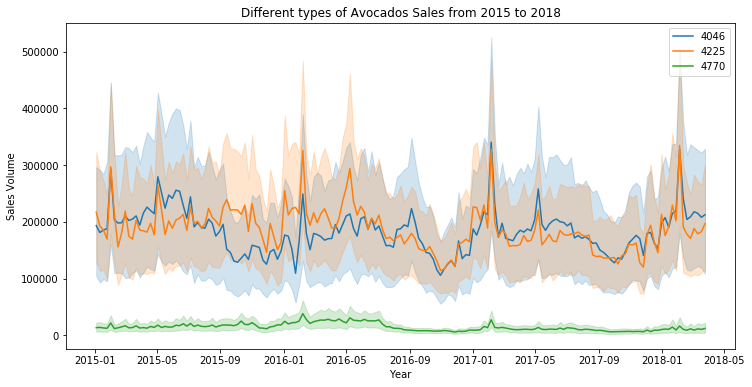

In [17]:
plt.figure(figsize=(12,6))
plt.title("Different types of Avocados Sales from 2015 to 2018")
sns.lineplot(data=df['4046'], label='4046')
sns.lineplot(data=df['4225'], label='4225')
sns.lineplot(data=df['4770'], label='4770')
plt.ylabel('Sales Volume')
plt.xlabel('Year')
plt.show()

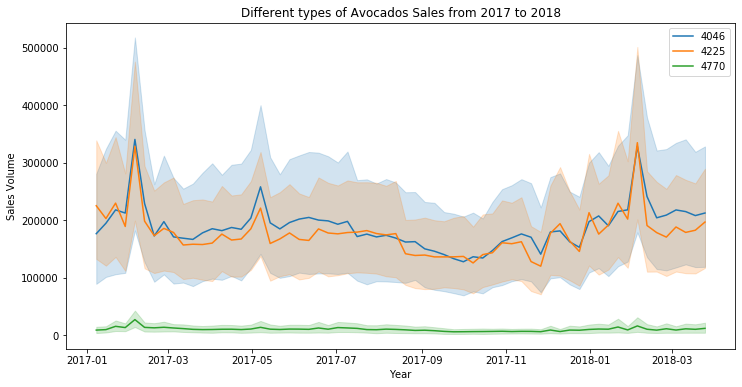

In [18]:
# Suppose we want to show data only from 2017 to 2018
plt.figure(figsize=(12,6))
plt.title("Different types of Avocados Sales from 2017 to 2018")
sns.lineplot(data=df['4046'].loc[df.index>'2017-1-1'], label='4046')
sns.lineplot(data=df['4225'].loc[df.index>'2017-1-1'], label='4225')
sns.lineplot(data=df['4770'].loc[df.index>'2017-1-1'], label='4770')
plt.ylabel('Sales Volume')
plt.xlabel('Year')
plt.show()

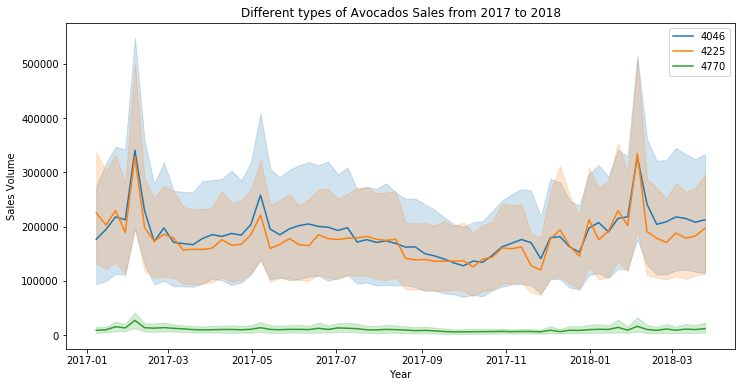

In [19]:
# Alternatively we can do 
newdf = df.loc[df.index > '2017-1-1']  # create a new variable newdf
plt.figure(figsize=(12,6))
plt.title("Different types of Avocados Sales from 2017 to 2018")
sns.lineplot(data=newdf['4046'], label='4046')
sns.lineplot(data=newdf['4225'], label='4225')
sns.lineplot(data=newdf['4770'], label='4770')
plt.ylabel('Sales Volume')
plt.xlabel('Year')
plt.show()

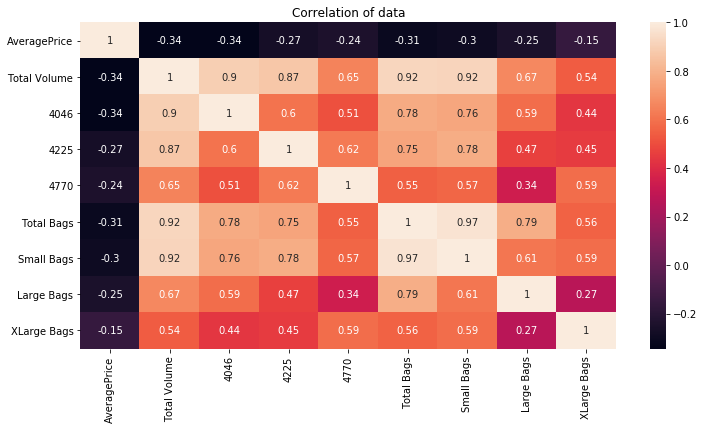

In [20]:
plt.figure(figsize=(12,6))
plt.title("Correlation of data")
sns.heatmap(df.corr(), annot=True) # df.corr() produces the correlation between data
plt.show()

In [21]:
# This is what df.corr() looks like
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
AveragePrice,1.000000,-0.343982,-0.342105,-0.267643,-0.241213,-0.307685,-0.296151,-0.248909,-0.154424
Total Volume,-0.343982,1.000000,0.895002,0.872547,0.649072,0.924980,0.920763,0.668446,0.538396
4046,-0.342105,0.895002,1.000000,0.603442,0.509280,0.776373,0.761604,0.589649,0.436249
4225,-0.267643,0.872547,0.603442,1.000000,0.623368,0.754345,0.782892,0.466107,0.449903
4770,-0.241213,0.649072,0.509280,0.623368,1.000000,0.553417,0.566304,0.343136,0.587963
Total Bags,-0.307685,0.924980,0.776373,0.754345,0.553417,1.000000,0.969591,0.787834,0.555153
Small Bags,-0.296151,0.920763,0.761604,0.782892,0.566304,0.969591,1.000000,0.613817,0.587470
Large Bags,-0.248909,0.668446,0.589649,0.466107,0.343136,0.787834,0.613817,1.000000,0.267308
XLarge Bags,-0.154424,0.538396,0.436249,0.449903,0.587963,0.555153,0.587470,0.267308,1.000000


---

# Assignment Task 💡

## Q1

Create a table that shows the sum of sales of each type of avocados (4046, 4225, 4770) in each region in 2017. Perform the task by following the steps below.

In [22]:
# Let dfs be a new variable that filter all data from df where year is 2017 
dfs = df.loc[(df.index > '2016-12-31') & (df.index < '2018-01-01')]
print(dfs)

            AveragePrice  Total Volume     4046       4225    4770  \
Date                                                                 
2017-12-31          1.47     113514.42  2622.70  101135.53   20.25   
2017-12-24          1.45      77039.09  2811.71   58592.23   19.06   
2017-12-17          1.43      70677.56  2578.95   50811.52   79.18   
2017-12-10          1.29      92325.53  3220.05   75147.56  104.36   
2017-12-03          1.39     139970.00  3772.00  126551.00  136.00   
...                  ...           ...      ...        ...     ...   
2017-01-29          1.30      17839.37  1486.34    4498.48   26.12   
2017-01-22          1.21      16430.64  1413.93    2820.53   20.25   
2017-01-15          1.19      17014.23  1203.87    2904.22   23.07   
2017-01-08          1.18      14375.39  1327.98    2617.20    5.75   
2017-01-01          1.28      15307.87   867.66    3434.02   37.30   

            Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
Date        

In [23]:
# Remove all columns from dfs except 4046, 4225, 4770, region
dfs = dfs[['4046','4225','4770','region']] 
print(dfs)

               4046       4225    4770            region
Date                                                    
2017-12-31  2622.70  101135.53   20.25            Albany
2017-12-24  2811.71   58592.23   19.06            Albany
2017-12-17  2578.95   50811.52   79.18            Albany
2017-12-10  3220.05   75147.56  104.36            Albany
2017-12-03  3772.00  126551.00  136.00            Albany
...             ...        ...     ...               ...
2017-01-29  1486.34    4498.48   26.12  WestTexNewMexico
2017-01-22  1413.93    2820.53   20.25  WestTexNewMexico
2017-01-15  1203.87    2904.22   23.07  WestTexNewMexico
2017-01-08  1327.98    2617.20    5.75  WestTexNewMexico
2017-01-01   867.66    3434.02   37.30  WestTexNewMexico

[5616 rows x 4 columns]


In [24]:
# Using groupby and sum to group dfs, by region
dfs = dfs.groupby('region')[['4046','4225','4770']].sum()
print(dfs)

                             4046          4225         4770
region                                                      
Albany               1.705022e+05  4.209518e+06     16056.16
Atlanta              1.387991e+07  3.244119e+06     23925.97
BaltimoreWashington  3.921146e+06  2.507907e+07    391281.83
Boise                2.008108e+06  2.271523e+05    430802.99
Boston               6.201361e+05  2.275807e+07    202009.42
BuffaloRochester     2.782468e+05  3.635038e+06      3043.76
California           1.149494e+08  1.051475e+08   7710648.67
Charlotte            2.776720e+06  4.505816e+06    411207.19
Chicago              4.830354e+06  2.466193e+07   6297647.51
CincinnatiDayton     4.148931e+05  5.042195e+06    105565.02
Columbus             4.201966e+06  1.505309e+06     96631.68
DallasFtWorth        3.411756e+07  1.308436e+07    496196.67
Denver               8.405850e+06  1.224715e+07    775668.00
Detroit              5.053984e+06  3.536809e+06   1420518.81
GrandRapids          1.1

## Q2 
Visualize the above table in a graph. Since there are too many regions, only the top 5 sales regions are displayed.

In [25]:
# Copy dfs into a new variable dft
# Then compute the sum of all different types of avocados, store that into a column call 'total'
dft = dfs 
dft['total']=dft['4046']+dft['4225']+dft['4770']
print(dft)

                             4046          4225         4770         total
region                                                                    
Albany               1.705022e+05  4.209518e+06     16056.16  4.396076e+06
Atlanta              1.387991e+07  3.244119e+06     23925.97  1.714795e+07
BaltimoreWashington  3.921146e+06  2.507907e+07    391281.83  2.939150e+07
Boise                2.008108e+06  2.271523e+05    430802.99  2.666063e+06
Boston               6.201361e+05  2.275807e+07    202009.42  2.358022e+07
BuffaloRochester     2.782468e+05  3.635038e+06      3043.76  3.916328e+06
California           1.149494e+08  1.051475e+08   7710648.67  2.278075e+08
Charlotte            2.776720e+06  4.505816e+06    411207.19  7.693744e+06
Chicago              4.830354e+06  2.466193e+07   6297647.51  3.578993e+07
CincinnatiDayton     4.148931e+05  5.042195e+06    105565.02  5.562654e+06
Columbus             4.201966e+06  1.505309e+06     96631.68  5.803906e+06
DallasFtWorth        3.41

In [26]:
# sort the variable dft by total. Use the command sort_values
dft = dft.sort_values(by="total",ascending= False)  
print(dft)

                             4046          4225         4770         total
region                                                                    
SouthCentral         1.691640e+08  5.869317e+07   2412798.40  2.302700e+08
California           1.149494e+08  1.051475e+08   7710648.67  2.278075e+08
West                 1.192689e+08  7.687167e+07   5973364.45  2.021140e+08
Northeast            1.453107e+07  1.421793e+08   1780119.33  1.584905e+08
Southeast            1.059120e+08  2.750374e+07    357360.93  1.337731e+08
GreatLakes           3.233803e+07  7.248527e+07  13050240.12  1.178735e+08
Midsouth             3.542271e+07  6.860004e+07   1773084.78  1.057958e+08
LosAngeles           6.225949e+07  2.752390e+07   4629497.16  9.441289e+07
Plains               4.479101e+07  2.555380e+07    548443.54  7.089324e+07
NewYork              3.703242e+06  4.591806e+07    888655.78  5.050996e+07
DallasFtWorth        3.411756e+07  1.308436e+07    496196.67  4.769812e+07
Houston              3.33

In [27]:
# Slice first 5 rows from dft and remove the column total
del(dft['total'])
dft = dft.head()
print(dft)

                      4046          4225        4770
region                                              
SouthCentral  1.691640e+08  5.869317e+07  2412798.40
California    1.149494e+08  1.051475e+08  7710648.67
West          1.192689e+08  7.687167e+07  5973364.45
Northeast     1.453107e+07  1.421793e+08  1780119.33
Southeast     1.059120e+08  2.750374e+07   357360.93


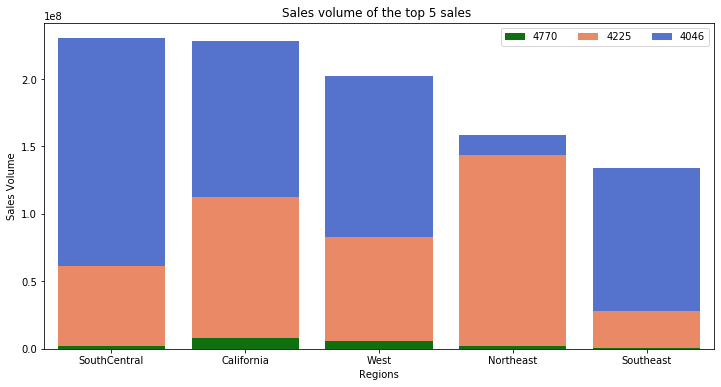

In [28]:
# Plot dft into a graph. Pick a graph that you think it is appropriate. Note: only one graph should be plotted.
# You might want to refer to https://seaborn.pydata.org/examples/index.html to pick your diagram
x=dft.index
y1=dft['4046']
y2=dft['4225']
y3=dft['4770']
plt.figure(figsize=(12,6))
plt.title("Sales volume of the top 5 sales ")
sns.barplot(x=x, y=y3, label='4770',color="green")
sns.barplot(x=x, y=y2, label='4225',color="coral",bottom=y3)
sns.barplot(x=x, y=y1, label='4046',color="royalblue",bottom=y3+y2)
plt.ylabel('Sales Volume')
plt.xlabel('Regions')
plt.legend(ncol=3, frameon=True)
plt.show()

## Q3 - Shall we contribute our part to save the world?

Novel Coronavirus (2019-nCoV), commonly known as 武漢肺炎 in greater China, outbreaks the world. In this task you are required to present the data published from World Health Organization (WHO) to alert the community. Go to this website: https://www.who.int/emergencies/diseases/novel-coronavirus-2019/situation-reports to download at least 8 situation reports where figures of confirmed case around the world were published in PDF files. Choose one visualization method to produce one or two graph(s) that allows us to visualize **the rapid growth of the infection case** (temporal) and **the widespread of the virus** (spatial). Make sure your visualization comply with the following:

* Your visualization must be done within this ipynb. You are not allowed to make graph in excel and embed here.
* However, data entry and data preprocessing (finding min/max/count etc..) can be done via excel and save as a csv file.
* Only data or data derived from the situation reports can be used. You are not allowed to consume external data even through these source are authentic. The reason is solely because we can have a fair set of data for everyone.
* You can, however, use any data published in these reports. Remember, your report needs to cover both temporal and spatial data.
* Do not restrict yourself to the types of graph that we have covered in this assignment or the lecture note.
* Your graph should follow the design rules taught in the lecture note (P.9)
* Only one or two graph(s) should be produced. The maximum mark for submitting only one graph and two graph(s) will be the same. If you submit more than two graphs. Whenever more than two graphs are submitted for this quesiton, only the first two graphs will be graded.
* State clearly your target audiance (TA) if it is not general public. For example, if you want to customize your TA to be HKBU students or elderly.

| Target Audiance |
|---|
| 💡(General Public by default) |

Marking Criteria:
* Ability to express the severity in rapid growth and widespread of the virus.
* Compliance of the design rules told in the lecture.
* Appropriate graph legend/title/label
* Ability to wisely select data to present. 


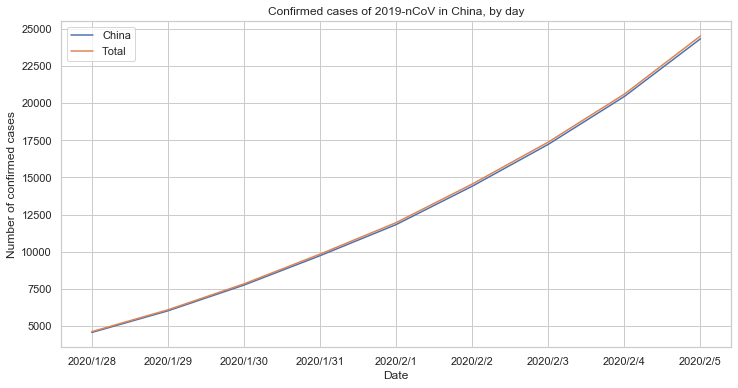

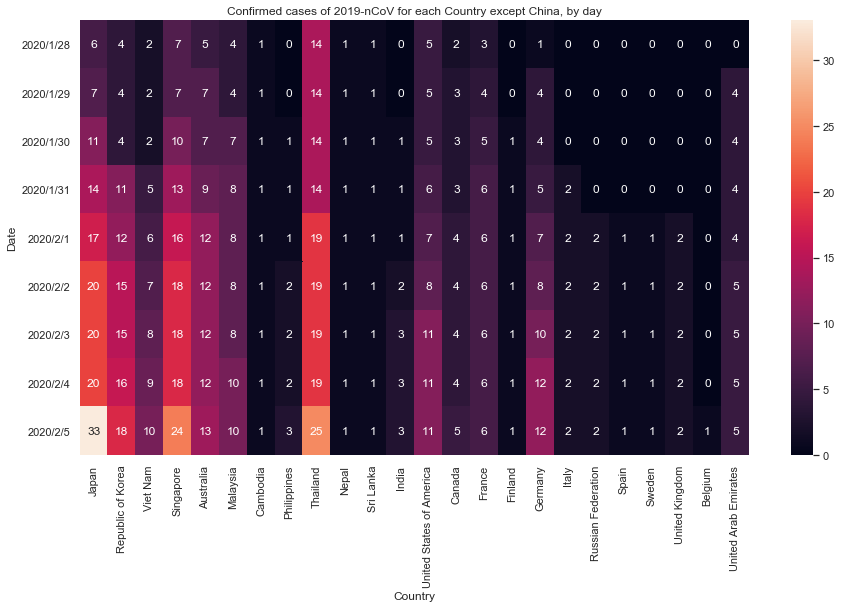

In [36]:
# Put your code here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('2019-nCov.csv', index_col='Date', parse_dates=False)

df1 = df[['China','Total']]
sns.set(style="whitegrid")
plt.figure(figsize=(12,6))
plt.title("Confirmed cases of 2019-nCoV in China, by day")
sns.lineplot(data=df1['China'], label='China')
sns.lineplot(data=df1['Total'], label='Total')
plt.ylabel('Number of confirmed cases')
plt.xlabel('Date')
plt.show()

df2=df
del(df2['China'],df2['Total'])
plt.figure(figsize=(15,8))
plt.title("Confirmed cases of 2019-nCoV for each Country except China, by day")
sns.heatmap(data=df2, annot=True)
plt.xlabel("Country")
plt.show()